In [83]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
plt.style.use('style_Matplotlib_charts.mplstyle')
import datetime as dt

In [84]:
# Load the dataset
df = pd.read_csv('livestock_sample_data copy 2.csv', sep='\t')

# Show the first few rows of the dataframe
df.head()


,DATE,TOTAL,NSW_TOTAL,VIC_TOTAL,QLD_TOTAL,SA_TOTAL,WA_TOTAL,TAS_TOTAL,NT_TOTAL
0,Sep-1976,1223.5,338.4,299.4,362.5,58.5,126.5,31.8,NaN
1,Dec-1976,1098.7,337.7,287.2,265.5,59.8,111.2,31.5,NaN
2,Mar-1977,1149.7,373.1,298.2,262.9,69.1,101.5,38.6,NaN
3,Jun-1977,1259.9,397.0,294.0,322.7,80.2,115.1,43.0,NaN
4,Sep-1977,1365.4,425.4,335.7,380.3,74.2,103.8,39.0,NaN


In [85]:
# Check for missing values
print(df.isnull().sum())

# If any missing values, fill them (or drop them, depending on the context)
df.dropna(inplace=True)



DATE         0
TOTAL        0
NSW_TOTAL    0
VIC_TOTAL    0
QLD_TOTAL    0
SA_TOTAL     0
WA_TOTAL     0
TAS_TOTAL    0
NT_TOTAL     8
dtype: int64


this is data wrangling

In [86]:
# Remove any extra spaces or hidden characters in column names
df.columns = df.columns.str.strip()

# Verify if all required columns exist
required_columns = ['NSW_TOTAL', 'VIC_TOTAL', 'QLD_TOTAL', 'SA_TOTAL', 'WA_TOTAL', 'TAS_TOTAL', 'NT_TOTAL']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Proceed with your code
    X = df[required_columns]
    y = df['TOTAL']


checks for missing columns in the data set

In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")

Training data size: 148
Testing data size: 38


In [90]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [91]:
y_pred = model.predict(X_test)

In [92]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.183321961198946


In [93]:
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")

R-squared: 0.999709311907507


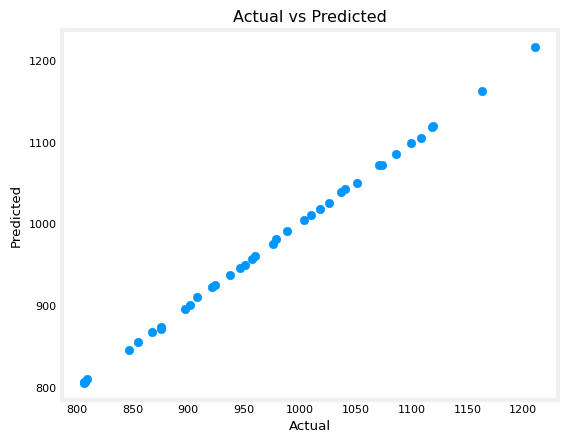

In [94]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()